# 使用 ASE 和 Quantum Espresso 进行 DFT 计算

原始版本的 DFT教程 使用原子模拟环境（ASE）和VASP写作，本教程使用ASE和免费的 Quantum Espresso 进行，同时使用 xespresso 作为ASE和Quantum Espresso交互的界面。

## 1. 密度泛函理论简介

### 1.1 背景知识

对 DFT 的全面概述超出了本书的范围，因为在文献中很容易找到关于这些主题的优秀评论，建议阅读以下段落。 相反，本章旨在为非专家以本书中使用的方式开始学习和使用 DFT 提供一个有用的起点。 此处提供的大部分信息是专家之间的标准知识，但其结果是目前文献中的论文很少对其进行讨论。 本章的第二个目标是为新用户提供了解大量可用文献的途径，并指出这些计算中的潜在困难和陷阱。

可以在 Sholl 和 Steckel 的 [Density Functional Theory: A Practical Introduction] 一书中找到对密度泛函理论的现代实用介绍。 Parr 和 Yang parr-yang 编写的一本关于 DFT 的相当标准的教科书。  The Chemist's Guide to DFT koch2001 更具可读性，包含更多用于运行计算的实用信息，但这两本书都侧重于分子系统。 固态物理学的标准教材是 Kittel kittel 和 Ashcroft 以及 Mermin ashcroft-mermin 所著。 两者都有其优点，前者在数学上更严谨，后者更具可读性。 然而，这两本书都不是特别容易与化学相关的。 为此，应参考 Roald Hoffman hoffmann 1987，RevModPhys.60.601 的异常清晰的著作，并遵循 N\o rskov 和同事hammer2000:adv-cat,greeley2002:elect 的工作。

[Density Functional Theory: A Practical Introduction]: DavidSholl&JaniceSteckel,Wiley,2009.

### 1.2 交换关联泛函

### 1.3 基组

基组其实就是一套模板化的函数。进行量子化学计算，最关键的部分就是求解出体系各个能级的波函数。根据分子轨道理论的思想，分子轨道可以用各个原子轨道的线性组合来拟合。因此，我们就可以拿一套原子的波函数（**基函数**）作为基底，混合它们来求解体系波函数。描述一个原子所用到的全部基函数就叫做一套**基组**。[参考来源](https://zhuanlan.zhihu.com/p/363177076)

### 1.4 赝势

> [关于 Quantum Espresso 的赝势](https://yyyu200.github.io/DFTbook/blogs/2019/06/03/PPlib/)
> 
> 赝势方法是相对于全电子势方法而言的。原子的内层电子波函数振荡很剧烈，于是基函数就需要很多平面波才能收敛，计算量就会很大，而通过模守恒赝势norm-conserved、超软赝势ultra-soft、投影扩展波projector augmented wave等方法，可以有效的减少平面波的个数。
> 
> QE官网给出了一个较为完整的赝势数据库（Link ），赝势文件可以直接下载。QE赝势的格式为UPF（Unified Pseudopotential Format）。
> QE中不同元素的不同类型赝势（NC，US，PAW）允许混用，不同交换关联（LDA、GGA等）赝势也允许混用，但是在输入文件需要重新设置统一的交换关联近似（input_dft），非共线计算（noncolin=.true.）需要至少一种元素使用非共线(rel)赝势。早期的赝势比较缺少，现在需要混用的情况不常见。
> 
> 赝势所需截断能ecutwfc和ecutrho需要测试以得到准确的计算结果，以下列出的赝势，作者通常公布出了赝势测试的结果，测试包括对单质及化合物的晶格常数、能带、声子频率、磁矩等的计算，赝势的结果比较是和全电子势进行的，与实验结果的比较是一种参照，即具有相似的误差，误差来源的大部分来自采用的交换关联泛函，所以误差并不是通过赝势的生成而减小的。实际使用中，如果这些计算结果与文献基本一致，则通常说明了赝势及截断能选取的可靠性。

### 1.5 费米温度与能带占据

### 1.6 自旋极化和磁性

## 2. 使用 ASE 搭建结构模型

### 2.1 分子结构

#### 2.1.1 内建分子结构

ASE 中内置了 G2 数据库的大量分子结构，可以使用 `molecule()` 命令创建这些内置的分子。以下为 G2 数据库中分子结构的全部列表。

In [1]:
from ase.collections import g2
print(g2.names)

['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '2-butyne', 'C2H5', 'BF3'

一些更加复杂的分子结构可以使用 ASE 内置的 PubChem api 接口查询，使用 `ase.data.pubchem.pubchem_atoms_search()` 命令从 PubChem 数据库中直接获取分子结构。

实例如下：

In [2]:
from ase.data.pubchem import pubchem_atoms_search, pubchem_atoms_conformer_search
cumene = pubchem_atoms_search(name='cumene')
benzene = pubchem_atoms_search(cid=241)
ethanol = pubchem_atoms_search(smiles='CCOH')

C:\Users\liuto\AppData\Roaming\Python\Python39\site-packages\ase\data\pubchem.py:79: UserWarning: The structure "cumene" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  warnings.warn('The structure "{}" has more than one '


### 2.2 体相结构

#### 2.2.1 常见体相晶体

可以使用 `ase.build.bulk` 命令创建常见的体相晶体结构。使用该命令创建 fcc 结构铜的示例如下：

![Cu_fcc](images/2021-11-15-14-14-53.png)


In [22]:
from ase.build import bulk
a1 = bulk('Cu', 'fcc', a=3.6)
a2 = bulk('Cu', 'fcc', a=3.6, orthorhombic=True)
a3 = bulk('Cu', 'fcc', a=3.6, cubic=True)

print(a1.cell, '\n', a2.cell, '\n', a3.cell)

Cell([[0.0, 1.8, 1.8], [1.8, 0.0, 1.8], [1.8, 1.8, 0.0]]) 
 Cell([2.545584412271571, 2.545584412271571, 3.6]) 
 Cell([3.6, 3.6, 3.6])


#### 2.2.2 黄铁矿晶体结构的建立

可以使用 `ase.spacegroup.crystal` 命令从空间群信息创建晶体结构。根据 Materials Project 中 mp226 黄铁矿结构信息创建结构的示例如下：

Atoms(symbols='Fe4S8', pbc=True, cell=[5.4281, 5.4281, 5.4281], spacegroup_kinds=...)

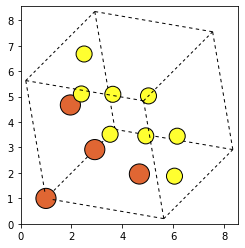

In [30]:
# build pyrite crystal follow mp226 structure
from ase.spacegroup import crystal
from ase.visualize.plot import plot_atoms
a = 0.3849
b = 5.4281
c = 90
pyrite = crystal(symbols=['Fe', 'S'],
                 basis=[(0, 0, 0), (a, a, a)],
                 spacegroup=205,
                 cellpar=[b, b, b, c, c, c])
# 输出晶体结构图像
plot_atoms(pyrite, rotation = '45x, 45y, 45z', radii = 0.3)
# 输出结构基本信息
pyrite

### 2.2 表面结构

#### 2.2.1 常见表面

fcc 、 bcc 和 hcp 等常见表面可以简单的直接使用单行命令构建。例如，构建具有 2×2×3 大小的 Al(111) fcc 表面，可以使用如下命令：

```python
from ase.build import fcc111
slab = fcc111('Al', size=(2,2,3), vacuum=10.0)
```

其中，使用 `fcc111` 命令创建表面，`vscuum` 参数为单侧的真空层厚度。

<AxesSubplot:>

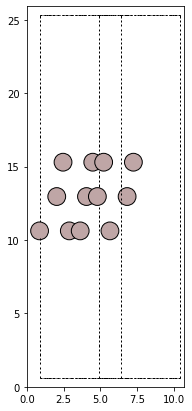

In [80]:
import matplotlib.pyplot as plt 
from ase.build import fcc111
from ase.visualize.plot import plot_atoms

slab = fcc111('Al', size=(2,2,3), vacuum=10.0)

fig, ax = plt.subplots(figsize = (7,7))
plot_atoms(slab, ax, rotation = '90x, 45y', radii = 0.5)

#### 2.2.2 切割表面

可以使用 `ase.build.surface` 或 `ase.build.surfaces_with_termination.surfaces_with_termination` 命令切割表面或具有特定终止原子的表面结构。

例如，切割三层具有单侧 10 Å 真空曾的黄铁矿 (100) 表面可以使用 `surface(pyrite, (1,0,0), 3, 10)` 命令。

类似的，可以使用 `surfaces_with_termination(lattice = pyrite, indices= (1,0,0), layers=3, vacuum = 10, termination='S')` 切割以 S 原子终止的表面。
**需要注意：** 特定终止的表面可能有多种形式，需要进行选择，如下实例：

Text(0.5, 1.0, 'pyrite (100) S slab 2')

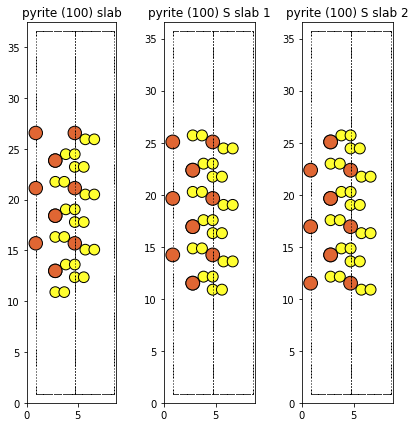

In [79]:
from ase.build import surface
from ase.build.surfaces_with_termination import surfaces_with_termination

import matplotlib.pyplot as plt 
from ase.visualize.plot import plot_atoms
# pyrite 100 surface 
pyrite_100 = surface(pyrite, (1,0,0), 3, 10)
# pyrite 100 surface with S termination
pyrite_100_S = surfaces_with_termination(lattice = pyrite, indices= (1,0,0), layers=3, vacuum = 10, termination='S')

fig, axs = plt.subplots(nrows = 1, ncols= 3, figsize = (7, 7))

plot_atoms(pyrite_100, axs[0], rotation = '90x, 45y', radii = 0.5)
axs[0].set_title('pyrite (100) slab')
plot_atoms(pyrite_100_S[1], axs[1], rotation = '90x, 45y', radii = 0.5)
axs[1].set_title('pyrite (100) S slab 1')
plot_atoms(pyrite_100_S[2], axs[2], rotation = '90x, 45y', radii = 0.5)
axs[2].set_title('pyrite (100) S slab 2')

#### 2.2.3 在表面添加吸附物



## 3. DFT 计算

### 3.1 基本属性计算

#### 3.1.1 原子化能的计算

以下将计算氮分子的原子化能。首先，创建一个包含一个氮的 Atoms 对象，并将一个快速 EMT 计算器作为参数附加到它上面。 然后计算孤立原子的总能量并将其存储在 e_atom 变量中。
定义分子对象，将氮分子保持在实验键长处。 然后将 EMT 计算器附加到分子上，并将总能量提取到 e_molecule 变量中。

In [55]:
from ase import Atoms
from xespresso import Espresso

psu = {'N': 'N.pbe-n-kjpaw_psl.1.0.0.UPF'}
calc = Espresso(label='scf/nitrogen',
                pseudopotentials=psu,
                occupations='smearing',
                ecutwfc = 50,
                ecutrho = 400,  
                degauss=0.1,
                kpts=None)
# 计算原子的能量
atom = Atoms('N')
atom.center(vacuum=3)
atom.calc = calc
e_atom = atom.get_potential_energy()
# 计算分子的能量
d = 1.1
molecule = Atoms('2N', [(0., 0., 0.), (0., 0., d)])
molecule.center(vacuum=3)
molecule.calc = calc
e_molecule = molecule.get_potential_energy()
# 计算原子化能
e_atomization = e_molecule - 2 * e_atom

print('Nitrogen atom energy: %5.2f eV' % e_atom)
print('Nitrogen molecule energy: %5.2f eV' % e_molecule)
print('Atomization energy: %5.2f eV' % -e_atomization)

=============================pw=============================
Nitrogen atom energy: -377.88 eV
Nitrogen molecule energy: -767.81 eV
Atomization energy: 12.04 eV


### 3.2 结构优化

#### 3.2.1 水分子的结构优化

In [5]:
from ase.build import molecule
from xespresso import Espresso

# 建立水分子结构
water = molecule('H2O')
water.center(vacuum=3)
print('原始结构', water)

# 赝势设置
psu = {'H':'H.pbe-kjpaw_psl.1.0.0.UPF', 'O': 'O.pbe-n-kjpaw_psl.1.0.0.UPF'}
# 建立计算器
calc = Espresso(
    # disk_io = 'none', # 不保存波函数文件
    calculation = 'relax', # 设置计算类型
    pseudopotentials = psu, # 赝势设置
    label = 'relax/water', # 计算过程的文件路径
    etot_conv_thr = 1e-4, # 优化过程总能收敛阈值 total energy (a.u)
    forc_conv_thr = 1e-4, # 优化过程力收敛阈值 forces (a.u)
    kpts = None # 使用 Γ 点进行优化
)
# 将计算器附加到结构，并运行计算
water.calc = calc
e =  water.get_potential_energy()
print('优化后总能为',e, 'eV')
print('优化后结构为', calc.results['atoms'])

原始结构 Atoms(symbols='OH2', pbc=False, cell=[6.0, 7.526478, 6.596309])
=============================pw=============================
优化后总能为 -599.1541934732669 eV
优化后结构为 Atoms(symbols='OH2', pbc=True, cell=[6.000000104575834, 7.526478131181286, 6.5963101149691035], species=..., calculator=SinglePointDFTCalculator(...))


## 3.3 电子结构计算
### 3.3.1 能带结构计算
以下计算水的能带结构

===========================bands============================
DEBUG    [set_label           ]: Directory: relax/water/bands
DEBUG    [set_label           ]: Prefix: water
DEBUG    [set_queue           ]: Espresso command: mpirun -np 2 /home/liutong/software/qe-7.0/bin/pw.x    -in  water.pwi  >  water.pwo
DEBUG    [set_queue           ]: Queue command: mpirun -np 2 /home/liutong/software/qe-7.0/bin/pw.x    -in  water.pwi  >  water.pwo
DEBUG    [read_convergence_post]: JOB DONE.
DEBUG    [check_state_post    ]: Parameters changed
DEBUG    [set_queue           ]: Espresso command: mpirun -np 2 /home/liutong/software/qe-7.0/bin/pw.x    -in  water.pwi  >  water.pwo
DEBUG    [set_queue           ]: Queue command: mpirun -np 2 /home/liutong/software/qe-7.0/bin/pw.x    -in  water.pwi  >  water.pwo
DEBUG    [write_input         ]: Write input successfully
DEBUG    [read_convergence    ]: JOB DONE
DEBUG    [read_results        ]: Read result successfully!


<AxesSubplot:ylabel='energies [eV]'>

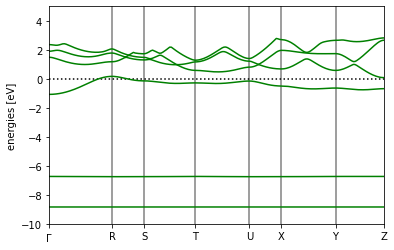

In [27]:
# 获取高对称点
water.cell.get_bravais_lattice().get_special_points()
# bands计算
calc.nscf(
    calculation='bands',
    kpts = {'path': 'GRSTUXYZ', 'npoints': 200},
    occupations= 'smearing',
    degauss =  0.01
)
calc.nscf_calculate()
# 能带绘图
bs = calc.band_structure()
bs.plot()

### 3.3.2 态密度计算

============================nscf============================
DEBUG    [set_label           ]: Directory: relax/water/nscf
DEBUG    [set_label           ]: Prefix: water
DEBUG    [set_queue           ]: Espresso command: mpirun -np 2 /home/liutong/software/qe-7.0/bin/pw.x    -in  water.pwi  >  water.pwo
DEBUG    [set_queue           ]: Queue command: mpirun -np 2 /home/liutong/software/qe-7.0/bin/pw.x    -in  water.pwi  >  water.pwo
DEBUG    [read_convergence_post]: JOB DONE.
DEBUG    [nscf_calculate      ]: Use previous results!
============================dos=============================
DEBUG    [set_label           ]: Directory: relax/water/dos
DEBUG    [set_label           ]: Prefix: water
DEBUG    [read_convergence_post]: JOB DONE.
DEBUG    [post                ]: Previous calculation done.
DEBUG    [post                ]: File and Parameters did not change. Use previous results!
=============================pw=============================
DEBUG    [set_label           ]: Director

<AxesSubplot:>

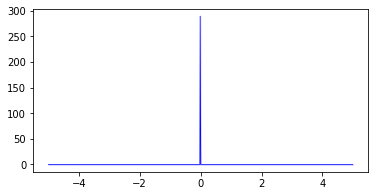

In [24]:
# 获取费米能级
fermi = calc.get_fermi_level()
# nscf 计算
calc.nscf(kpts = (5,5,5))
calc.nscf_calculate()
# dos 计算
calc.post(package='dos', Emin = fermi - 10, Emax = fermi + 5, DeltaE = 0.01)
# dos 绘图
from xespresso.dos import DOS
dos = DOS(label = 'relax/water')
dos.read_dos()
dos.plot_dos(color = 'blue')